<a href="https://colab.research.google.com/github/sk27110/basic_ml_hse/blob/task_2_intro_ml/homework_02_matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2. Библиотеки Matplotlib, Seaborn

Задание выполнил(а)
Кочетков Александр

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

### Задание 1 (0.5 балла)

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

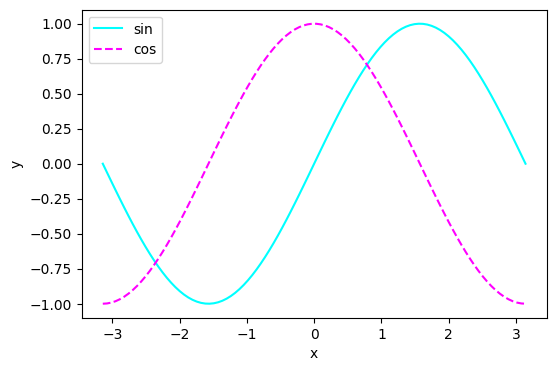

In [3]:
x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(6,4))

plt.plot(x, y_sin, color = '#00FFFF')
plt.plot(x, y_cos, linestyle = '--', color = '#FF00FF')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(['sin', 'cos'])

plt.show()


### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

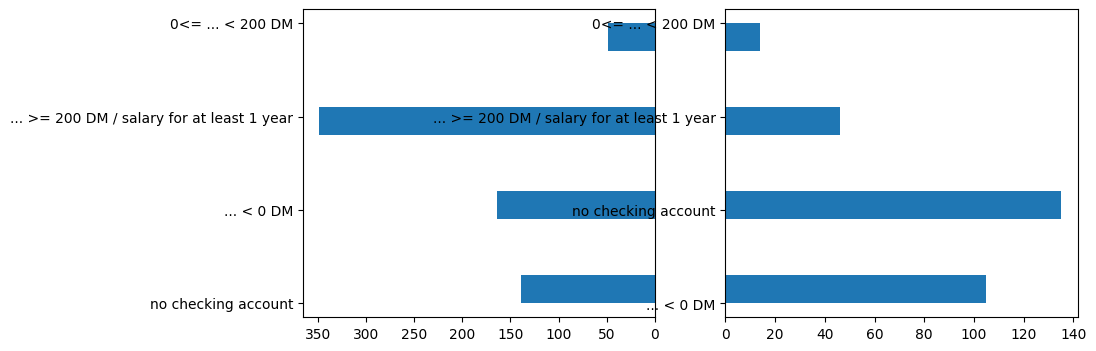

In [6]:
df = pd.read_csv(GERMAN_CREDIT)
df
fig, axis = plt.subplots(1,2, figsize = (10,4))
axis[0].hist(df[df['credit_risk'] == 'good']['status'], orientation = 'horizontal')
axis[1].hist(df[df['credit_risk'] == 'bad']['status'], orientation = 'horizontal')
axis[0].invert_xaxis()

### Задание 3  (0.5 балла)

In [7]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<Axes: xlabel='status', ylabel='count'>

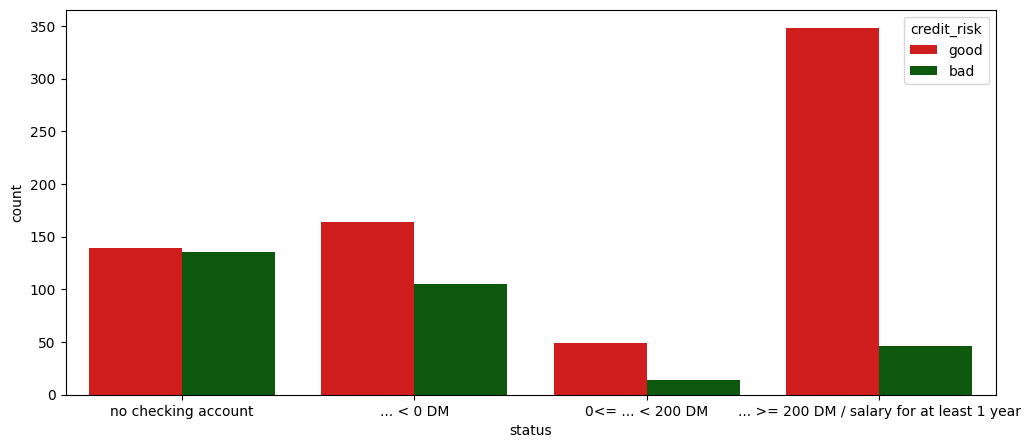

In [8]:
plt.figure(figsize =(12, 5))
order = ['no checking account','... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']

sns.countplot(df, x="status", hue='credit_risk', order=order, palette=['#EE0000', '#006600'])

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<Axes: xlabel='status', ylabel='age'>

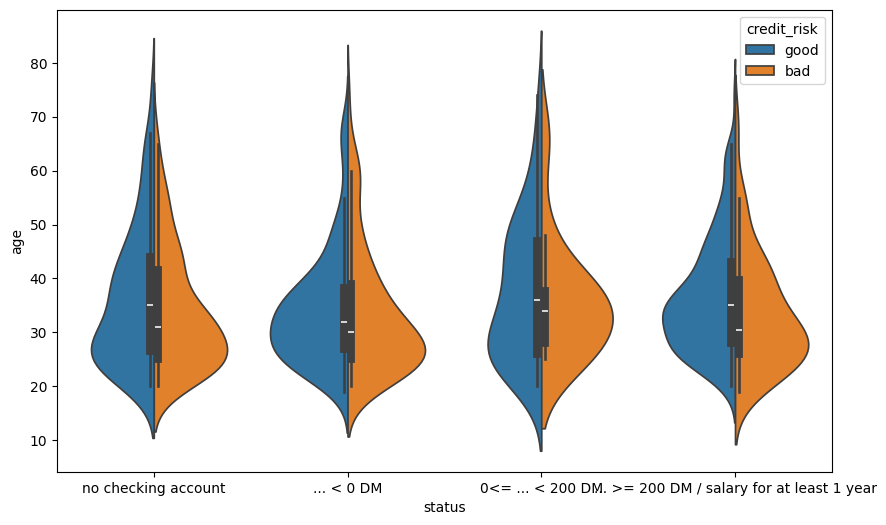

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='status', y='age', hue='credit_risk', split=True, order=order)

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

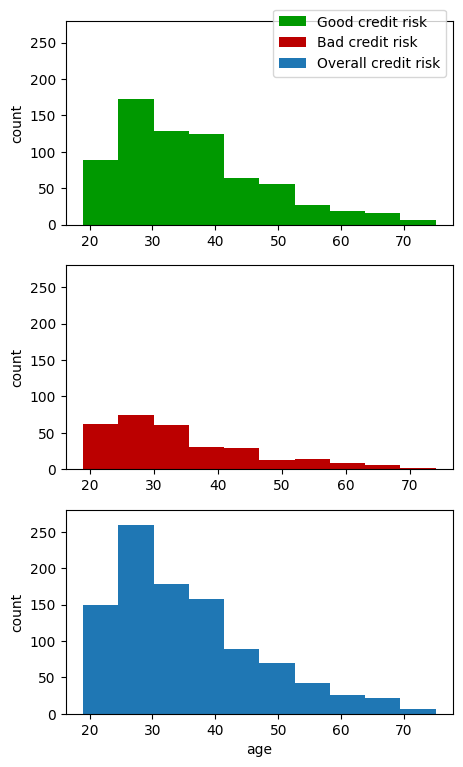

In [10]:
# plt.figure(figsize=(10,10))
# g = sns.FacetGrid(data = df, row = 'credit_risk')
# g = g.map(sns.histplot, "age", binrange = (20,90), binwidth = 10)
# sns.histplot(data=df, x="age")
fig, axes = plt.subplots(3,1,figsize=(5,9))
axes[0].hist(data=df[df['credit_risk']=='good'], x='age', color='#009900', label='Good credit risk')
axes[1].hist(data=df[df['credit_risk']=='bad'], x='age', color='#BB0000', label='Bad credit risk')
axes[2].hist(data=df, x='age', label='Overall credit risk')
axes[2].set_xlabel('age')
for i in range(3):
  axes[i].set_ylim(0,280)
  axes[i].set_ylabel('count')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

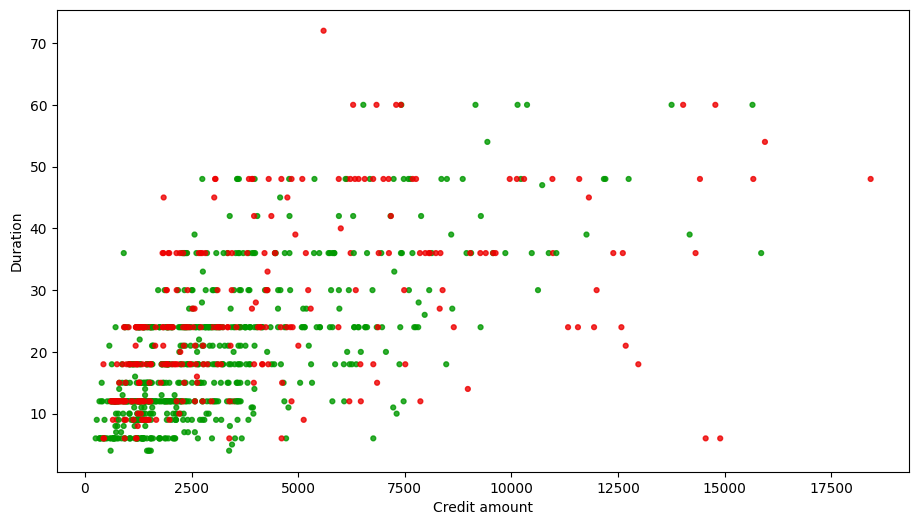

In [11]:
plt.figure(figsize=(11,6))
colors = {'good': '#009900', 'bad': '#EE0000'}
plt.scatter(df['amount'], df['duration'], c=df['credit_risk'].apply(lambda x: colors[x]), alpha=0.8, s=12)
plt.xlabel('Credit amount')
plt.ylabel("Duration")

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [12]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

fig = px.scatter_3d(df, x='amount', y='duration', z='age', color='credit_risk', labels={'amount': 'Credit amount', 'duration': 'Duration', 'age': 'Age'})
fig.update_traces(marker=dict(size=4))
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()

## Раздел 2. Визуализации в датасете Netflix

In [13]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов имеет пропуски в столбце director.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

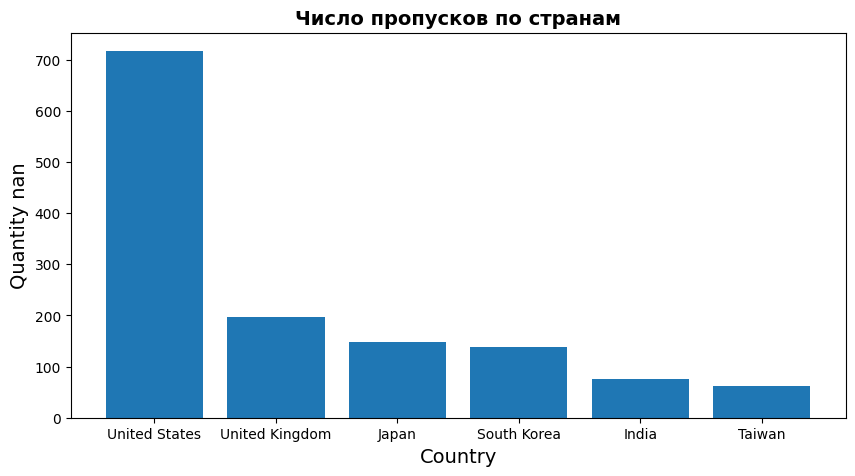

In [14]:
df = pd.read_csv(NETFLIX_TITLES)
a = df.groupby('country').agg(x=('director', lambda col: col.isna().sum()))
b = a.nlargest(6, 'x')
plt.figure(figsize=(10, 5))
plt.bar(b['x'].index, b['x'].values)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Quantity nan', fontsize=14)
plt.title('Число пропусков по странам', fontsize=14, fontweight='bold')
plt.show()




### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

([<matplotlib.patches.Wedge object at 0x7d4ea3261590>, <matplotlib.patches.Wedge object at 0x7d4ea3256fd0>, <matplotlib.patches.Wedge object at 0x7d4ea3256150>, <matplotlib.patches.Wedge object at 0x7d4ea3257890>, <matplotlib.patches.Wedge object at 0x7d4ea3277dd0>], [Text(-0.32808257021055093, 1.0499342013307496, 'United States'), Text(-0.31264903544151984, -1.054632912741437, 'India'), Text(0.69149979194749, -0.8554694838137583, 'United Kingdom'), Text(0.997958838545974, -0.4626858076145957, 'Japan'), Text(1.0901095868506152, -0.14717706566031696, 'South Korea')], [Text(-0.178954129205755, 0.5726913825440452, '60%'), Text(-0.17053583751355628, -0.5752543160407837, '22%'), Text(0.3771817046986309, -0.4666197184438681, '9%'), Text(0.5443411846614403, -0.2523740768806885, '5%'), Text(0.5946052291912446, -0.08027839945108196, '4%')])


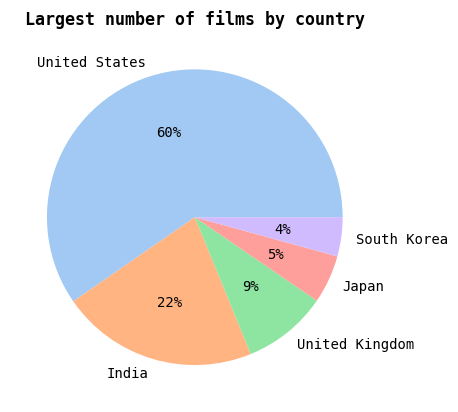

In [15]:
a = df['country'].value_counts().nlargest(5)
colors = sns.color_palette('pastel')[0:5]
plt.title("Largest number of films by country", family='monospace', fontweight='bold')
font_properties = {'family': 'monospace', 'fontsize': 10}
print(plt.pie(a.values, labels=a.index, colors=colors, autopct='%.0f%%', textprops=font_properties))



### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

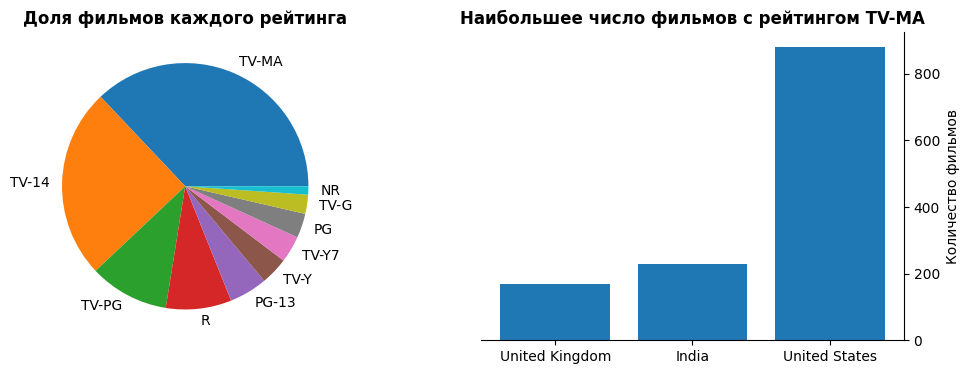

In [16]:
fig, axis = plt.subplots(1,2, figsize=(12,4))
data = df['rating'].value_counts()
data = data[data>=50]
axis[0].pie(data.values, labels = data.index) #круговая
data = df[df['rating'] == 'TV-MA'].value_counts('country').nlargest(3)
axis[1].bar(data.index, data.values)
axis[1].yaxis.tick_right()  # Перемещаем метки оси Y вправо
axis[1].yaxis.set_label_position("right")
axis[1].invert_xaxis()
axis[0].set_title('Доля фильмов каждого рейтинга', fontweight='bold')
axis[1].set_title('Наибольшее число фильмов с рейтингом TV-MA', fontweight='bold')
axis[1].set_ylabel('Количество фильмов')
axis[1].spines['top'].set_visible(False)
axis[1].spines['left'].set_visible(False)
plt.show()


### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

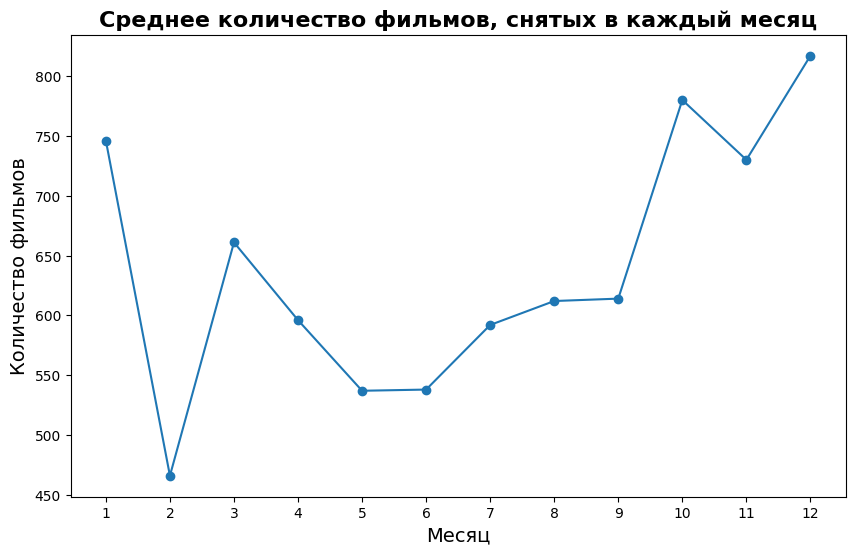

In [17]:
df = pd.read_csv(NETFLIX_TITLES)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

monthly_counts = df.groupby('month').size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')

plt.title('Среднее количество фильмов, снятых в каждый месяц', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество фильмов', fontsize=14)
plt.xticks(ticks=range(1, 13))

plt.show()


### Задание 5 (1 балл)

Постройте линеный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

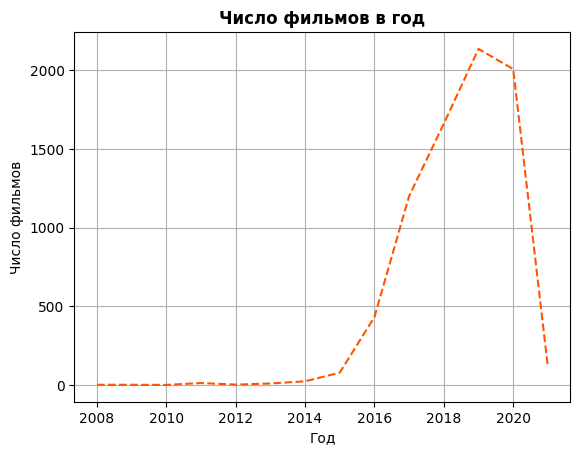

In [18]:
year_film = df['year'].value_counts().sort_index()
plt.plot(year_film.index, year_film.values, linestyle = '--', color = '#FF5500')
plt.title('Число фильмов в год', fontweight = 'bold')
plt.xlabel('Год')
plt.ylabel('Число фильмов')
plt.grid()
plt.show()

# print(year_film)
# print(df['year'].value_counts().sort_index())


### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

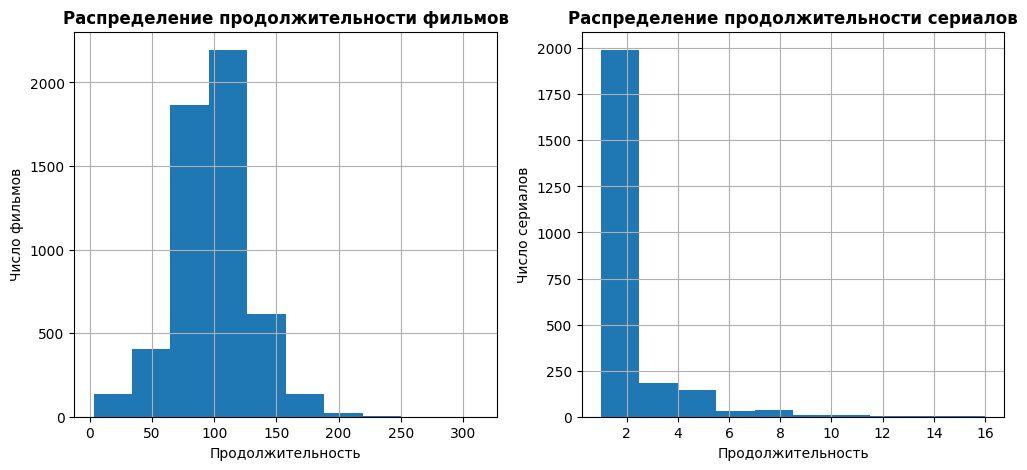

In [23]:
df['min'] = df.apply(lambda x: int(x['duration'].split()[0]) if x['type'] == 'Movie' else np.nan, axis=1)
df['season'] = df.apply(lambda x: int(x['duration'].split()[0]) if x['type'] == 'TV Show' else np.nan, axis=1)
fig, axis = plt.subplots(1,2, figsize=(12,5))
df[df['type'] == 'Movie']['min'].hist(ax=axis[0])
axis[0].set_xlabel('Продолжительность')
axis[0].set_ylabel('Число фильмов')
axis[0].set_title('Распределение продолжительности фильмов', fontweight='bold', fontsize=12)
df[df['type'] == 'TV Show']['season'].hist(ax=axis[1])
axis[1].set_xlabel('Продолжительность')
axis[1].set_ylabel('Число сериалов')
axis[1].set_title('Распределение продолжительности сериалов', fontweight='bold', fontsize=12)
plt.show()

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

<Axes: ylabel='min'>

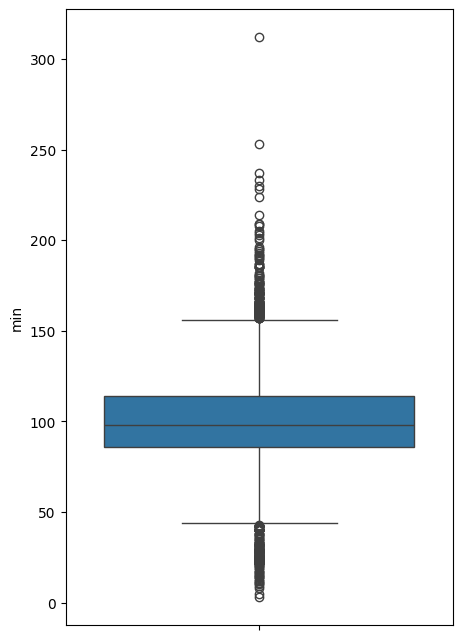

In [20]:
plt.figure(figsize=(5,8))
sns.boxplot(data = df[df['type']=='Movie']['min'], vert = True)

Медиана продолжительности всех фильмов -- примерно 95 минут. 50% всех фильмов имеют продолжительность от 85 до 115 минут(ну примерно). Так же мы видим, что есть много фильмов, продолжительность которых меньше 45 минут (возможно это выбросы в данных или короткометражки). Так же есть много фильмов, которые длиннее 155 минут(возможно это тоже выбрасы). Приемлимой же длиной фильма считается от 45 минут до 155 минут.

### Задание 8 (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.